# Задание 1. Использование предобученной модели

## 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [8]:
import matplotlib.pyplot as plt
from tensorflow import keras

model = keras.applications.MobileNetV2()

model.summary() # Вывод краткого описания архитектуры созданной модели
model.get_config() # Вывод конфигурации созданной модели

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

{'name': 'mobilenetv2_1.00_224',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_2'},
   'name': 'input_2',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'Conv1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (2, 2),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': False,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'Conv1',
   'inbound_nodes': [[['input_2', 0, 0, {}]]]},
  {'class_name': 'BatchNo

## 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

In [53]:
from urllib.request import urlopen
import cv2
import numpy as np

imageUrls = [
    # 1. Виолончель
    "https://thumbs.static-thomann.de/thumb/padthumb600x600/pics/bdb/278802/14033132_800.jpg",
    # 2. Туалетная бумага
    "https://tork-images.essity.com/images-c5/4/258004/optimized-AzureJPG2K/240616-nowrap.jpg?w=800&h=800&imPolicy=dynamic",
    # 3. Черепаха
    "https://npr.brightspotcdn.com/dims4/default/75d8732/2147483647/strip/true/crop/700x394+0+0/resize/880x495!/quality/90/?url=http%3A%2F%2Fnpr-brightspot.s3.amazonaws.com%2F37%2F81%2Fe279df75486f906dd79aa6ca5074%2Fdiamondbackterrapinturtletoofwc.jpg",
    # 4. Английский фоксхаунд
    "https://www.purina.co.nz/sites/default/files/2021-07/english-foxhound-p.jpg",
    # 5. Губная помада
    "https://goldapple.ru/media/catalog/product/cache/fb5d06f7acfb2f26f85333624ccbfb5e/7/7/773602048496_1_l9ejhqww0uusrhnn.jpg"
    ]

images = []
for imageUrl in imageUrls:
    req = urlopen(imageUrl)
    image = np.asarray(bytearray(req.read()), dtype=np.uint8)
    image = cv2.imdecode(image, -1)
    images.append(image)

## 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС.

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [54]:
def normalize(images, shape):
  proc_images = []
  for image in images:
    proc_image = image.copy()
    proc_image = cv2.resize(proc_image, (shape[0], shape[1]))
    proc_images.append(proc_image)
  return np.asarray(proc_images)

## 1.4. Напишите функцию, принимающую на вход список с представлениями обработаннах изображений (результат работы функции из п. 1.3.) и возвращающую список предсказанных нейросетью классов. 

In [55]:
def predict(images):
    normalized_images = normalize(images, (224, 224, 3))
    preprcessed_images = keras.applications.mobilenet_v2.preprocess_input(normalized_images)
    prediction = model.predict(preprcessed_images)
    return prediction

In [56]:
def print_predict(preds, image):
    output = image.copy()

    height = 30
    margin = 30
    for pred in preds:
        height += margin
        text = "{}: {:.2f}%".format(pred[1], pred[2] * 100)
        _ = cv2.putText(output, text, (10, height), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
            (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

## 1.5. Выведите изображения и соответствующие им классы, вызывая соответствующие функции

1/1 [==============================] - 0s 19ms/step


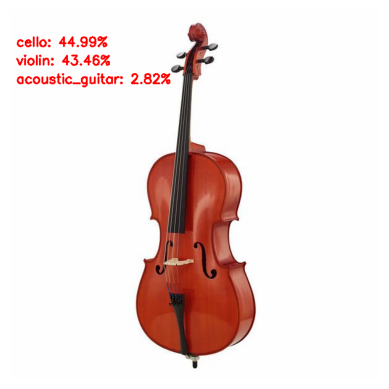

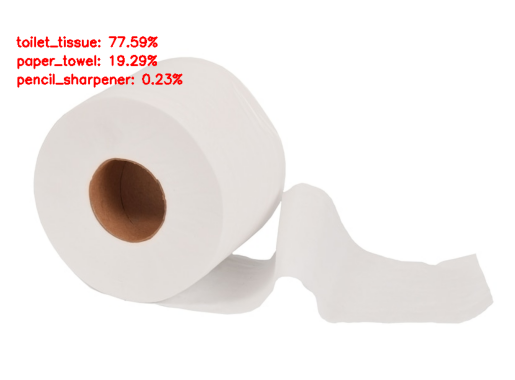

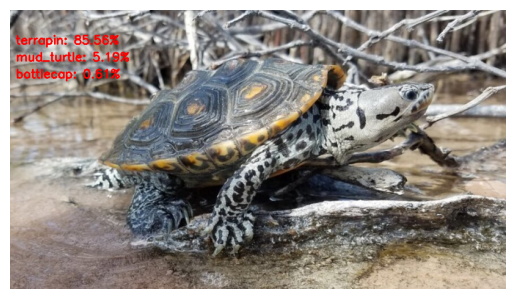

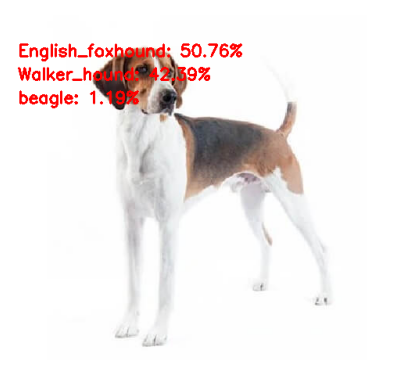

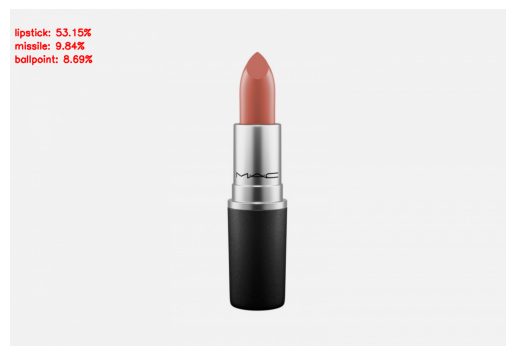

In [57]:
predictions = predict(images)
predictions = keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)
for i, preds in enumerate(predictions):
    print_predict(preds, images[i])

# Задание 2. Использование обученной модели для работы со своим датасетом

## 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [179]:
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
import numpy as np
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam


## 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку
Датасет - https://www.kaggle.com/datasets/ichhadhari/indian-birds, из него взято пять классов  Cattle Egret, Common Kingfisher, Indian Grey Hornbill, Sarus Crane, White Breasted Waterhen

In [180]:
img_height,img_width=192,192
batch_size=32
train_ds = keras.preprocessing.image_dataset_from_directory(
  './data',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = keras.preprocessing.image_dataset_from_directory(
  './data',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)


Found 7500 files belonging to 5 classes.
Using 6000 files for training.
Found 7500 files belonging to 5 classes.
Using 1500 files for validation.
['Cattle-Egret', 'Common-Kingfisher', 'Indian-Grey-Hornbill', 'Sarus-Crane', 'White-Breasted-Waterhen']


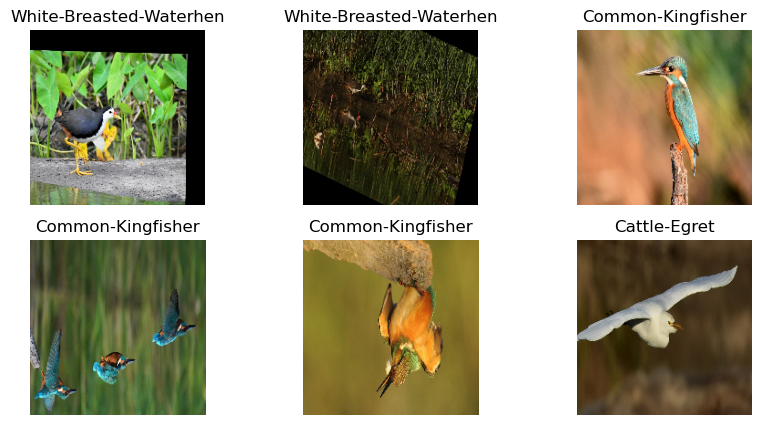

In [181]:
# Отобразим часть данных из обучающей выборки
plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## 2.3. Обучение своей модели на основе предобученной модели *MobileNetV2*

Создадим модель на основе MobileNetV2 и добавим к ней слои, при этом слои модели не будем подвергать изменению при обучении

In [182]:
base_model_1 = keras.applications.MobileNetV2(include_top=False,
                   input_shape=(192, 192, 3), 
                   pooling='avg', 
                   weights='imagenet')
base_model_1.summary()

Model: "mobilenetv2_1.00_192"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 96, 96, 32)   864         ['input_14[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 96, 96, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 96, 96, 32)   0           ['bn_Conv1[0][

In [183]:
base_model_1.trainable = False

model_1 = Sequential()
model_1.add(base_model_1)
model_1.add(Flatten())
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(5, activation='softmax'))
model_1.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_1.get_config()


{'name': 'sequential_13',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 192, 192, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'mobilenetv2_1.00_192_input'}},
  {'class_name': 'Functional',
   'config': {'name': 'mobilenetv2_1.00_192',
    'layers': [{'class_name': 'InputLayer',
      'config': {'batch_input_shape': (None, 192, 192, 3),
       'dtype': 'float32',
       'sparse': False,
       'ragged': False,
       'name': 'input_14'},
      'name': 'input_14',
      'inbound_nodes': []},
     {'class_name': 'Conv2D',
      'config': {'name': 'Conv1',
       'trainable': False,
       'dtype': 'float32',
       'filters': 32,
       'kernel_size': (3, 3),
       'strides': (2, 2),
       'padding': 'same',
       'data_format': 'channels_last',
       'dilation_rate': (1, 1),
       'groups': 1,
       'activation': 'linear',
       'use_bias': False,
       'kernel_initializer': {'class_name': 'GlorotUniform',

In [184]:
epochs=15
history_1 = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs 
)

Epoch 1/15
188/188 [==============================] - 9s 36ms/step - loss: 0.9847 - accuracy: 0.6197 - val_loss: 0.8103 - val_accuracy: 0.6820
Epoch 2/15
188/188 [==============================] - 7s 34ms/step - loss: 0.7274 - accuracy: 0.7367 - val_loss: 0.7306 - val_accuracy: 0.7227
Epoch 3/15
188/188 [==============================] - 6s 33ms/step - loss: 0.6354 - accuracy: 0.7740 - val_loss: 0.6865 - val_accuracy: 0.7387
Epoch 4/15
188/188 [==============================] - 6s 32ms/step - loss: 0.5821 - accuracy: 0.7898 - val_loss: 0.6315 - val_accuracy: 0.7680
Epoch 5/15
188/188 [==============================] - 7s 39ms/step - loss: 0.5391 - accuracy: 0.8062 - val_loss: 0.6113 - val_accuracy: 0.7827
Epoch 6/15
188/188 [==============================] - 14s 74ms/step - loss: 0.5100 - accuracy: 0.8168 - val_loss: 0.6098 - val_accuracy: 0.7633
Epoch 7/15
188/188 [==============================] - 7s 34ms/step - loss: 0.4723 - accuracy: 0.8325 - val_loss: 0.5953 - val_accuracy: 0.785

## 2.4. Визуализация процесса обучения модели

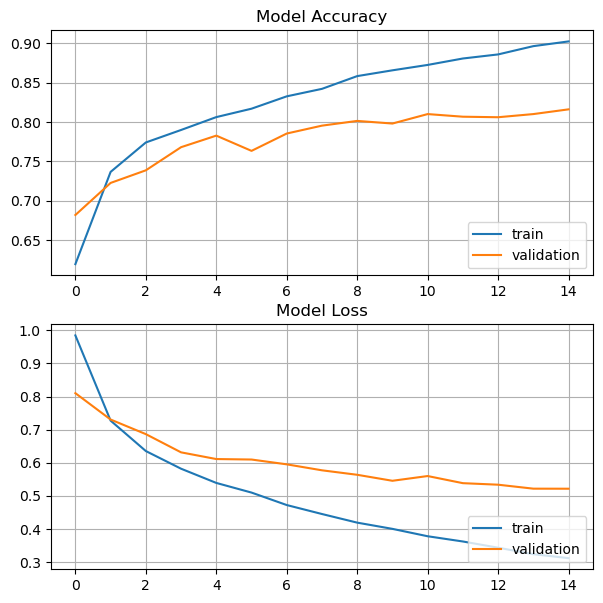

In [185]:
fig, (modelAcc, modelLoss) = plt.subplots(2)
fig.set_figwidth(7)
fig.set_figheight(7)

modelAcc.set_title('Model Accuracy')
modelAcc.grid()
modelAcc.plot(history_1.history['accuracy'])
modelAcc.plot(history_1.history['val_accuracy'])
modelAcc.legend(['train', 'validation'], loc="lower right")

modelLoss.set_title('Model Loss')
modelLoss.grid()
modelLoss.plot(history_1.history['loss'])
modelLoss.plot(history_1.history['val_loss'])
modelLoss.legend(['train', 'validation'], loc="lower right")


plt.show()

Также создадим модель, у которой несколько последних слоев будут обучаемыми

In [186]:
base_model_2 = keras.applications.MobileNetV2(include_top=False,
                   input_shape=(192, 192, 3), 
                   pooling='avg', 
                   weights='imagenet')

for layer in base_model_2.layers[:-12]:
    layer.trainable = False

model_2 = Sequential()
model_2.add(base_model_2)
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(5, activation='softmax'))
model_2.compile(optimizer=Adam(learning_rate=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_2.get_config()

{'name': 'sequential_14',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 192, 192, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'mobilenetv2_1.00_192_input'}},
  {'class_name': 'Functional',
   'config': {'name': 'mobilenetv2_1.00_192',
    'layers': [{'class_name': 'InputLayer',
      'config': {'batch_input_shape': (None, 192, 192, 3),
       'dtype': 'float32',
       'sparse': False,
       'ragged': False,
       'name': 'input_15'},
      'name': 'input_15',
      'inbound_nodes': []},
     {'class_name': 'Conv2D',
      'config': {'name': 'Conv1',
       'trainable': False,
       'dtype': 'float32',
       'filters': 32,
       'kernel_size': (3, 3),
       'strides': (2, 2),
       'padding': 'same',
       'data_format': 'channels_last',
       'dilation_rate': (1, 1),
       'groups': 1,
       'activation': 'linear',
       'use_bias': False,
       'kernel_initializer': {'class_name': 'GlorotUniform',

In [187]:
# Обучим модель
epochs=25
history_2 = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs 
)

Epoch 1/25
188/188 [==============================] - 12s 38ms/step - loss: 1.2201 - accuracy: 0.5207 - val_loss: 1.3847 - val_accuracy: 0.4047
Epoch 2/25
188/188 [==============================] - 7s 35ms/step - loss: 0.8768 - accuracy: 0.6837 - val_loss: 1.2733 - val_accuracy: 0.4580
Epoch 3/25
188/188 [==============================] - 7s 34ms/step - loss: 0.7484 - accuracy: 0.7328 - val_loss: 1.1733 - val_accuracy: 0.5240
Epoch 4/25
188/188 [==============================] - 7s 35ms/step - loss: 0.6669 - accuracy: 0.7648 - val_loss: 1.0627 - val_accuracy: 0.5780
Epoch 5/25
188/188 [==============================] - 7s 34ms/step - loss: 0.6081 - accuracy: 0.7910 - val_loss: 0.9627 - val_accuracy: 0.6267
Epoch 6/25
188/188 [==============================] - 7s 35ms/step - loss: 0.5642 - accuracy: 0.8062 - val_loss: 0.8686 - val_accuracy: 0.6793
Epoch 7/25
188/188 [==============================] - 7s 35ms/step - loss: 0.5192 - accuracy: 0.8212 - val_loss: 0.8070 - val_accuracy: 0.708

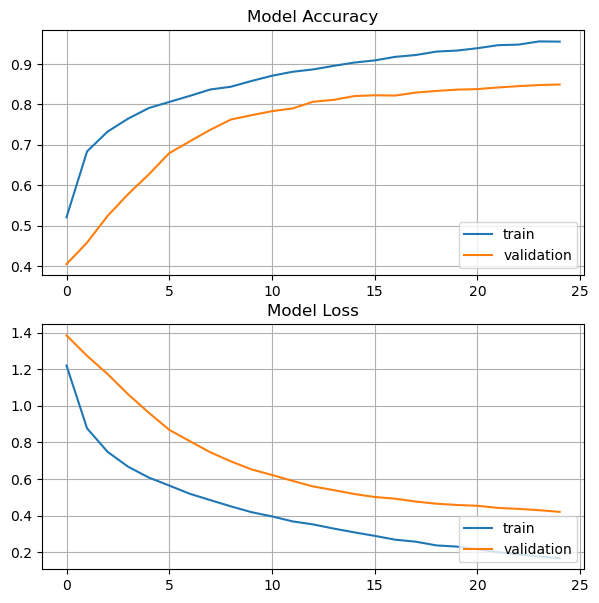

In [188]:
# Графики обучения
fig, (modelAcc, modelLoss) = plt.subplots(2)
fig.set_figwidth(7)
fig.set_figheight(7)

modelAcc.set_title('Model Accuracy')
modelAcc.grid()
modelAcc.plot(history_2.history['accuracy'])
modelAcc.plot(history_2.history['val_accuracy'])
modelAcc.legend(['train', 'validation'], loc="lower right")

modelLoss.set_title('Model Loss')
modelLoss.grid()
modelLoss.plot(history_2.history['loss'])
modelLoss.plot(history_2.history['val_loss'])
modelLoss.legend(['train', 'validation'], loc="lower right")


plt.show()

## 2.5. Подготовьте набор проверочных данных см. Задание №1 (п. 1.2, 1.3, 1.4)

In [200]:
from urllib.request import urlopen
import cv2
import numpy as np

correct_answers = ['Cattle-Egret', 'Common-Kingfisher', 'Indian-Grey-Hornbill', 'Sarus-Crane', 'White-Breasted-Waterhen']
imageUrls = [
    # 1. Cattle Egret
    "https://www.birdspot.co.uk/wp-content/uploads/2019/12/cattle-egret.jpg",
    # 2. Common Kingfisher
    "https://i.pinimg.com/originals/b4/b0/30/b4b030af3ef775b3d4b1939e5578fb8f.jpg",
    # 3. Indian Grey Hornbill
    "https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Indian_Grey_Hornbill_Ocyceros_birostris_female_by_Dr._Raju_Kasambe_DSCN4231_%287%29.jpg/1200px-Indian_Grey_Hornbill_Ocyceros_birostris_female_by_Dr._Raju_Kasambe_DSCN4231_%287%29.jpg",
    # 4. Sarus Crane
    "https://www.francisjtaylor.co.uk/wp-content/uploads/2020/05/73I4589-copy.jpg",
    # 5. White Breasted Waterhen
    "https://i.pinimg.com/originals/74/87/e1/7487e19a9092c90c02c8c3ac0bbf4903.jpg"
    ]

images = []
for imageUrl in imageUrls:
    req = urlopen(imageUrl)
    image = np.asarray(bytearray(req.read()), dtype=np.uint8)
    image = cv2.imdecode(image, -1)
    images.append(image)

In [201]:
def normalize(images, shape):
  proc_images = []
  for image in images:
    proc_image = image.copy()
    proc_image = cv2.resize(proc_image, (shape[0], shape[1]))
    proc_images.append(proc_image)
  return np.asarray(proc_images)

In [202]:
def predict(models, images):
    normalized_images = normalize(images, (192, 192, 3))
    models_predictions = []
    for model in models: 
        prediction = model.predict(normalized_images)
        models_predictions.append(prediction)
    return models_predictions

In [207]:
def decode_prediction(prediction, class_names):
    max_index = np.argmax(prediction)
    max_indices = np.argpartition(prediction, -3)[-3:]
    top3 = []
    for index in max_indices:
        top3.append([class_names[index], prediction[index]])
    return sorted(top3, key=lambda lst: lst[1], reverse=True)

In [210]:
def print_predict(class_names, models_predictions, correct_answers, image, image_index):
    output = image.copy()

    height = 20
    margin = 30
    models_margin = 40
    _ = cv2.putText(output, f'Correct Answer: {correct_answers[image_index]}', (10, height), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0, 0, 255), 2)
    for i, model_predition in enumerate(models_predictions):
        height += models_margin
        _ = cv2.putText(output, f'Model #{i+1}', (10, height), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0, 0, 255), 2)
        predictions = decode_prediction(model_predition[image_index], class_names)
        for pred in predictions:
            height += margin
            text = "{}: {:.2f}%".format(pred[0], pred[1] * 100)
            _ = cv2.putText(output, text, (10, height), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

## 2.6. Организуйте вывод изображений и соответствующих им классов

1/1 [==============================] - 0s 19ms/step


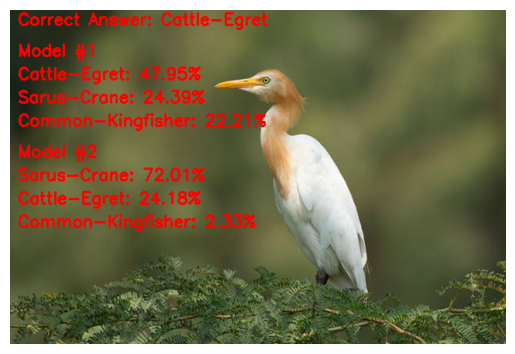

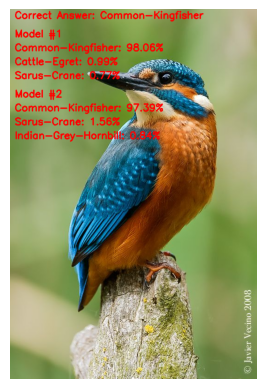

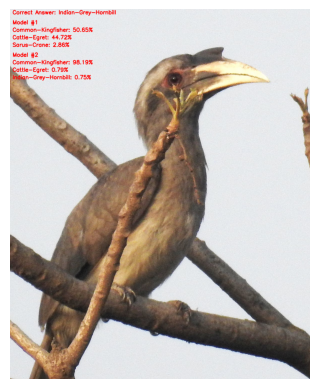

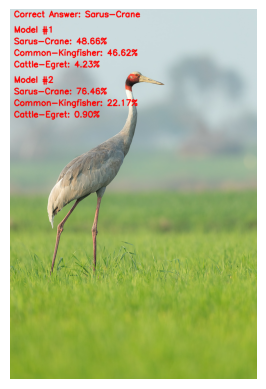

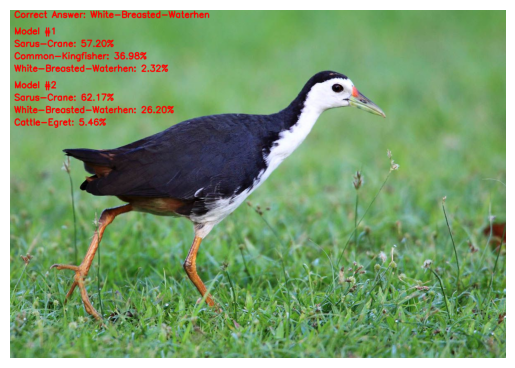

In [211]:
predictions = predict(models=[model_1, model_2], images=images)
for i, image in enumerate(images):
    print_predict(class_names, predictions, correct_answers, image, i)